In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score



## Ler DATASET XGBOOST

In [3]:
data_xgoost = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/2_data_XGBoost.csv')

#### Função Auxiliar

In [4]:
def plot_confusion_matrix_with_labels(confusion_matrix, label_mapping):
    # Criar um mapeamento inverso
    reverse_label_mapping = {v: k for k, v in label_mapping.items()}
    
    # Aplicar o mapeamento inverso na matriz de confusão
    cm_with_labels = np.zeros_like(confusion_matrix, dtype=object)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            cm_with_labels[i, j] = f"{reverse_label_mapping[i]} (Pred: {reverse_label_mapping[j]})"

    # Criar um DataFrame para facilitar a visualização
    df_cm = pd.DataFrame(confusion_matrix, index=reverse_label_mapping.values(), columns=reverse_label_mapping.values())
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix with Labels')
    plt.show()
label_mapping = {
    'CN-CN': 0,
    'AD-AD': 1,
    'MCI-AD': 2,
    'MCI-MCI': 3,
    'CN-MCI' : 4
}

# Modelo

In [5]:
X = data_xgoost.drop(['Transition'], axis= 1)
y = data_xgoost['Transition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)


              precision    recall  f1-score   support

           0       0.55      0.75      0.63        24
           1       0.53      0.53      0.53        15
           2       0.42      0.29      0.34        17
           3       0.35      0.33      0.34        18
           4       0.00      0.00      0.00         3

    accuracy                           0.48        77
   macro avg       0.37      0.38      0.37        77
weighted avg       0.45      0.48      0.46        77



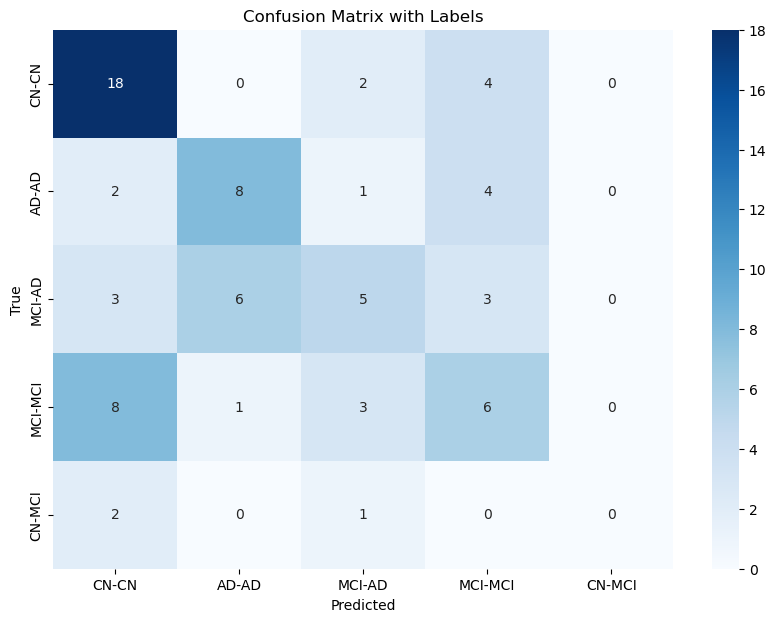

In [6]:
xgboost_model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.05,colsample_bytree=0.4, subsample=0.8, random_state=34)

xgboost_model.fit(X_train, y_train)
xgboost_pred = xgboost_model.predict(X_test)
print(classification_report(y_test, xgboost_pred,zero_division=0))
cm = confusion_matrix(y_test, xgboost_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)

In [7]:
xgboost_score = cross_val_score(xgboost_model, X, y, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {xgboost_score}")
print(f"Cross Validation Score Média: {xgboost_score.mean()}")
print(f"Cross Validation Score STD: {xgboost_score.std()}")

Cross Validation Score: [0.35520624 0.34251116 0.27027375 0.35213351 0.32621453]
Cross Validation Score Média: 0.3292678390596873
Cross Validation Score STD: 0.031179000720746714


## Normalização

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = data_xgoost.drop(['Transition'], axis= 1)
y_norm = data_xgoost['Transition']
X_norm = scaler.fit_transform(X_train_norm)

In [9]:
X_train_norm, X_test, y_train_norm, y_test = train_test_split(X_norm, y_norm, test_size=0.25, random_state=34, stratify=y)


              precision    recall  f1-score   support

           0       0.56      0.79      0.66        24
           1       0.53      0.53      0.53        15
           2       0.38      0.29      0.33        17
           3       0.33      0.28      0.30        18
           4       0.00      0.00      0.00         3

    accuracy                           0.48        77
   macro avg       0.36      0.38      0.36        77
weighted avg       0.44      0.48      0.45        77



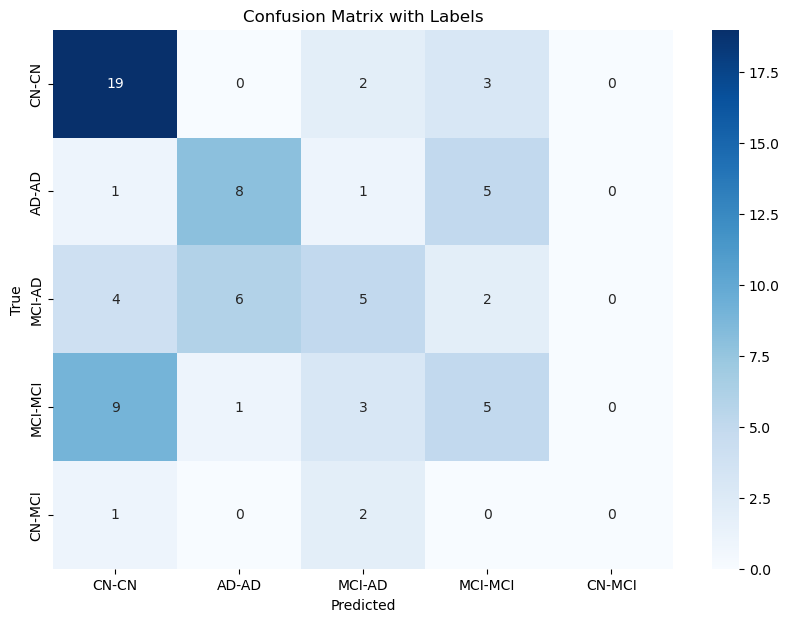

In [10]:
xgboost_model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.05,colsample_bytree=0.4, subsample=0.8, random_state=34)

xgboost_model.fit(X_train_norm, y_train_norm)
xgboost_pred = xgboost_model.predict(X_test)
print(classification_report(y_test, xgboost_pred,zero_division=0))
cm = confusion_matrix(y_test, xgboost_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)

In [11]:
xgboost_score = cross_val_score(xgboost_model, X_norm, y_norm, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {xgboost_score}")
print(f"Cross Validation Score Média: {xgboost_score.mean()}")
print(f"Cross Validation Score STD: {xgboost_score.std()}")

Cross Validation Score: [0.35054545 0.34011208 0.28410774 0.35222502 0.32621453]
Cross Validation Score Média: 0.3306409667776705
Cross Validation Score STD: 0.02504674208697755


Podemos perceber, pelo valor do cross Validation que o xgboost benificiou positivamente de forma ligueira da normalização dos dados. 

## SMOTE

Y Train Values:
Transition
0    72
3    53
2    51
1    45
4     7
Name: count, dtype: int64
Y Train Values:
Transition
0    72
4    72
3    53
2    51
1    45
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.52      0.62      0.57        24
           1       0.50      0.53      0.52        15
           2       0.33      0.29      0.31        17
           3       0.33      0.28      0.30        18
           4       0.00      0.00      0.00         3

    accuracy                           0.43        77
   macro avg       0.34      0.35      0.34        77
weighted avg       0.41      0.43      0.42        77



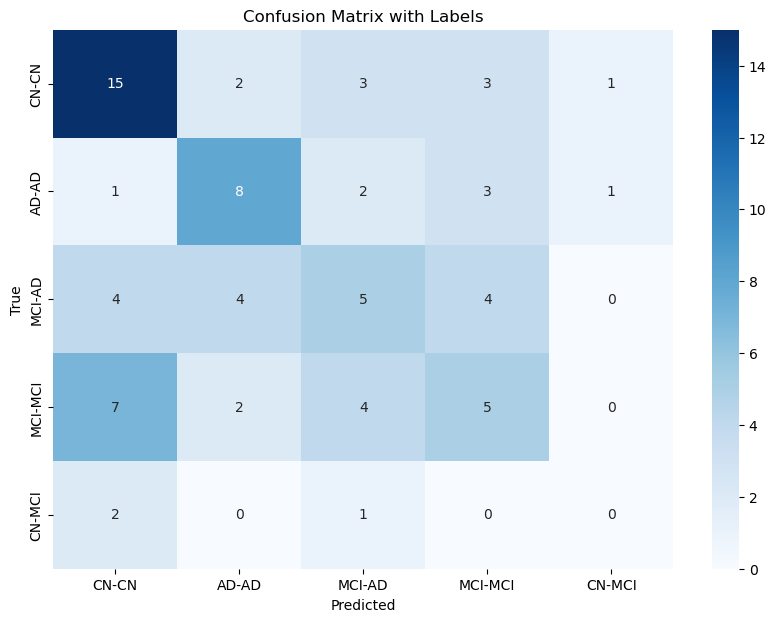

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.25, random_state=34, stratify=y)


print("Y Train Values:")
print(y_train.value_counts())


smote = SMOTE(sampling_strategy="minority", random_state=34)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("Y Train Values:")
print(y_train_smote.value_counts())

xg_modelo_smote =XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.05,colsample_bytree=0.4, subsample=0.8, random_state=34)

xg_modelo_smote.fit(X_train_smote, y_train_smote)
xg_smote_pred = xg_modelo_smote.predict(X_test)
print(classification_report(y_test, xg_smote_pred,zero_division=0))
cm = confusion_matrix(y_test, xg_smote_pred)
plot_confusion_matrix_with_labels(cm,label_mapping)



Com o smote percebemos que a metrica de ***sampling_strategy="minority"*** havia uma diminuição ligueira na fold criada no train_test_split, decidimos portanto não implementar o smote na nossa solução


Número de features por intervalo de importância:
Entre 0.012 e inf: 2
Entre 0.010 e 0.012: 0
Entre 0.008 e 0.010: 3
Entre 0.006 e 0.008: 6
Entre 0.004 e 0.006: 24
Entre 0.002 e 0.004: 200
Entre 0.000 e 0.002: 169


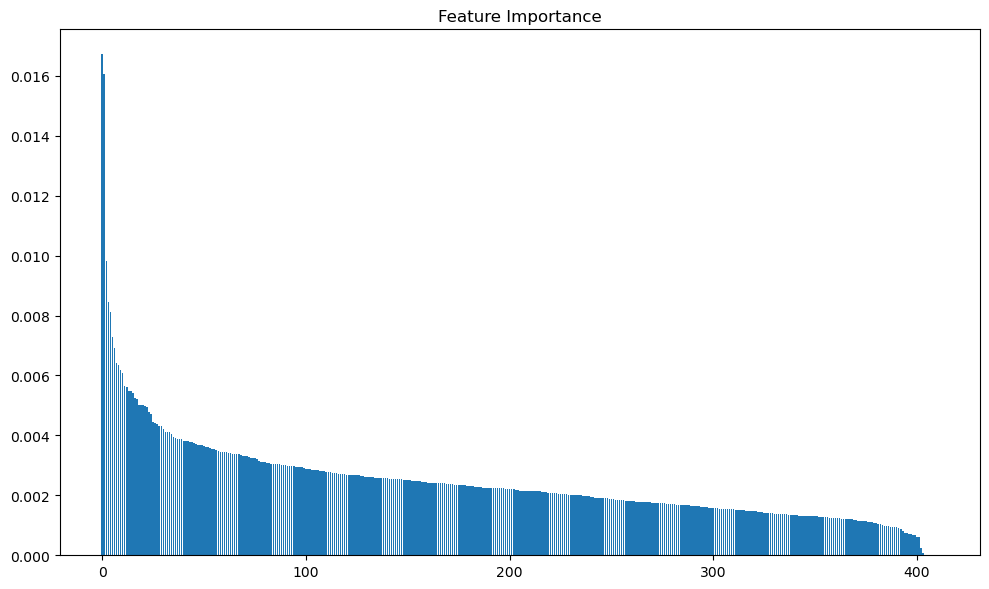

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def feature_importance(model, X_train):

    # Obter as importâncias das features
    importances = model.feature_importances_

    # Exibir os intervalos de importância
    thresholds = [(0.012, float('inf')), (0.010, 0.012), (0.008, 0.010), 
                  (0.006, 0.008), (0.004, 0.006), (0.002, 0.004), (0, 0.002)]
    
    print("\nNúmero de features por intervalo de importância:")
    for low, high in thresholds:
        count = np.sum((importances > low) & (importances <= high))
        print(f"Entre {low:.3f} e {high:.3f}: {count}")

    # Ordenar as importâncias em ordem decrescente
    indices = np.argsort(importances)[::-1]

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    
    # Adicionar barras
    plt.bar(range(X_train.shape[1]), importances[indices])

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()



feature_importance(xgboost_model,X_train)


--- Avaliando com threshold: 0.012 ---
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        24
           1       0.58      0.47      0.52        15
           2       0.17      0.29      0.22        17
           3       0.08      0.06      0.06        18
           4       0.00      0.00      0.00         3

    accuracy                           0.31        77
   macro avg       0.27      0.25      0.26        77
weighted avg       0.33      0.31      0.31        77



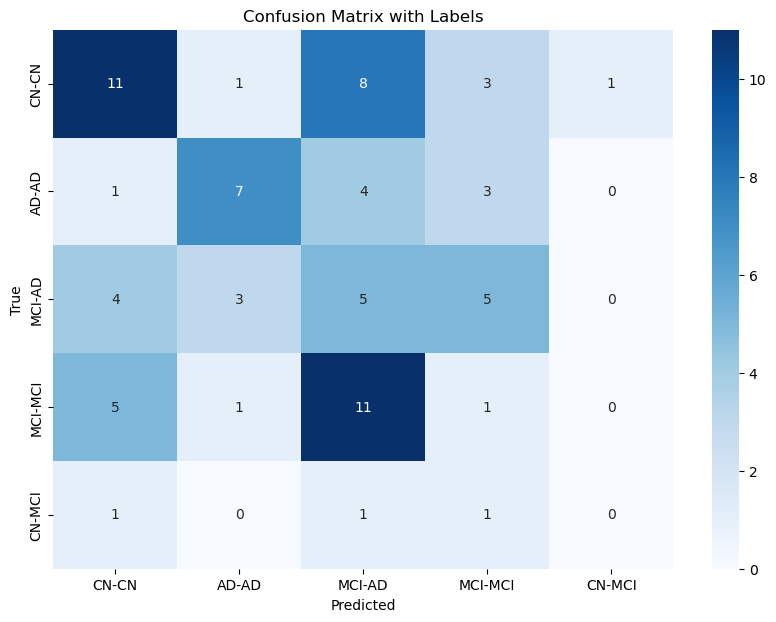

Cross Validation Score: [0.2708037  0.28777778 0.28031746 0.31089627 0.39152212]
Cross Validation Score Média: 0.30826346499870577
Cross Validation Score STD: 0.043687095554752406

--- Avaliando com threshold: 0.01 ---
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        24
           1       0.58      0.47      0.52        15
           2       0.17      0.29      0.22        17
           3       0.08      0.06      0.06        18
           4       0.00      0.00      0.00         3

    accuracy                           0.31        77
   macro avg       0.27      0.25      0.26        77
weighted avg       0.33      0.31      0.31        77



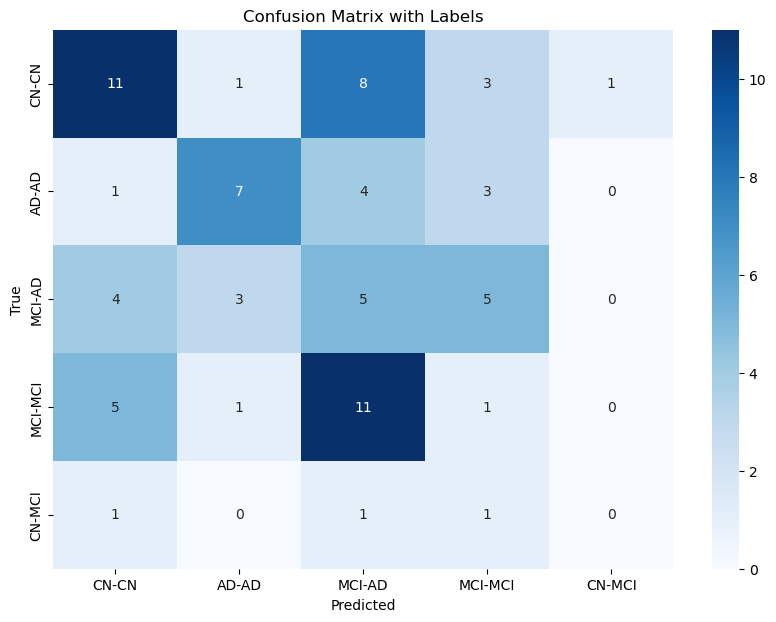

Cross Validation Score: [0.2708037  0.28777778 0.28031746 0.31089627 0.39152212]
Cross Validation Score Média: 0.30826346499870577
Cross Validation Score STD: 0.043687095554752406

--- Avaliando com threshold: 0.008 ---
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        24
           1       0.69      0.60      0.64        15
           2       0.20      0.29      0.24        17
           3       0.23      0.17      0.19        18
           4       0.00      0.00      0.00         3

    accuracy                           0.39        77
   macro avg       0.32      0.32      0.32        77
weighted avg       0.39      0.39      0.39        77



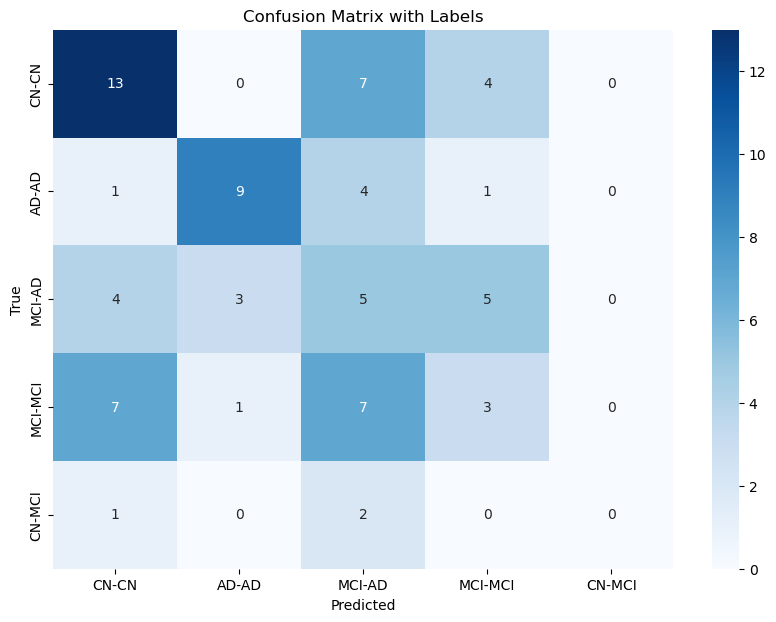

Cross Validation Score: [0.2708037  0.28777778 0.28031746 0.31089627 0.39152212]
Cross Validation Score Média: 0.30826346499870577
Cross Validation Score STD: 0.043687095554752406

--- Avaliando com threshold: 0.006 ---
              precision    recall  f1-score   support

           0       0.43      0.38      0.40        24
           1       0.67      0.67      0.67        15
           2       0.33      0.47      0.39        17
           3       0.24      0.22      0.23        18
           4       0.00      0.00      0.00         3

    accuracy                           0.40        77
   macro avg       0.33      0.35      0.34        77
weighted avg       0.39      0.40      0.39        77



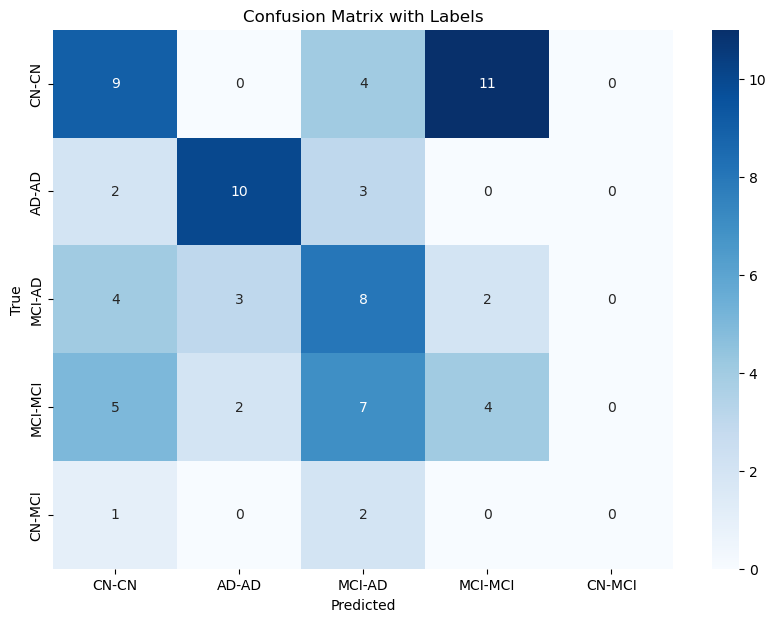

Cross Validation Score: [0.2708037  0.28777778 0.28031746 0.31089627 0.39152212]
Cross Validation Score Média: 0.30826346499870577
Cross Validation Score STD: 0.043687095554752406

--- Avaliando com threshold: 0.002 ---
              precision    recall  f1-score   support

           0       0.59      0.79      0.68        24
           1       0.53      0.53      0.53        15
           2       0.36      0.29      0.32        17
           3       0.31      0.28      0.29        18
           4       0.00      0.00      0.00         3

    accuracy                           0.48        77
   macro avg       0.36      0.38      0.37        77
weighted avg       0.44      0.48      0.46        77



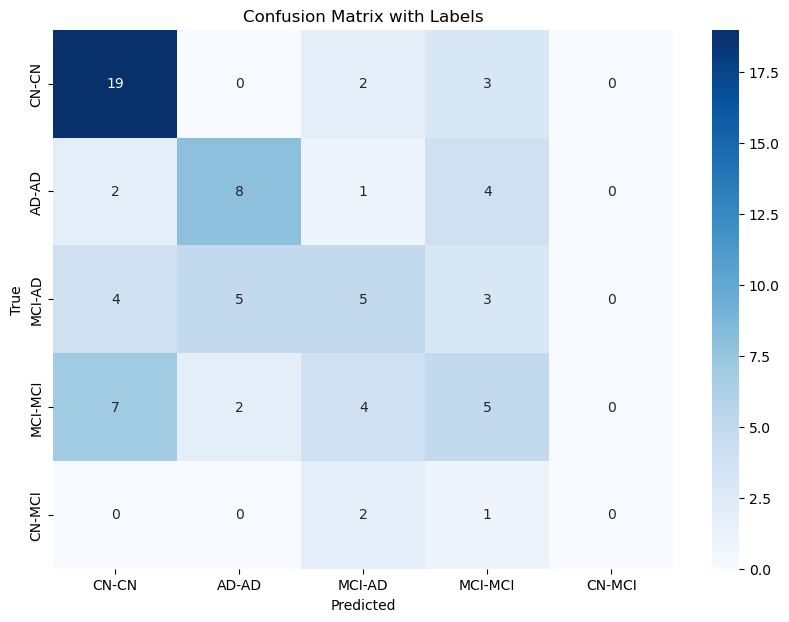

Cross Validation Score: [0.2708037  0.28777778 0.28031746 0.31089627 0.39152212]
Cross Validation Score Média: 0.30826346499870577
Cross Validation Score STD: 0.043687095554752406


In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np


def evaluate_model_with_thresholds(model, X_train, X_test, y_train, y_test, thresholds, label_mapping,X,y):
    """
    Avalia o modelo RandomForestClassifier alterando o threshold para seleção de features.

    Parâmetros:
        model: O modelo RandomForestClassifier a ser utilizado.
        X_train: Conjunto de treinamento.
        X_test: Conjunto de teste.
        y_train: Labels do conjunto de treinamento.
        y_test: Labels do conjunto de teste.
        thresholds: Lista de thresholds para seleção de features.
        label_mapping: Mapeamento de rótulos para a matriz de confusão.
    """
    for threshold in thresholds:
        print(f"\n--- Avaliando com threshold: {threshold} ---")

        # Criar objeto SelectFromModel com o threshold atual
        sfm = SelectFromModel(model, threshold=threshold)

        # Selecionar as features mais importantes
        X_important_train = sfm.fit_transform(X_train, y_train)
        X_important_test = sfm.transform(X_test)

        # Treinar o modelo com as features selecionadas
        model.fit(X_important_train, y_train)
        
        # Fazer previsões
        y_pred = model.predict(X_important_test)

        # Imprimir relatório de classificação
        print(classification_report(y_test, y_pred, zero_division=0))

        # Calcular e plotar matriz de confusão
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix_with_labels(cm, label_mapping)

        # Cross-validation no conjunto original
        score_norm = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

        # Exibir resultados de validação cruzada
        print(f"Cross Validation Score: {score_norm}")
        print(f"Cross Validation Score Média: {score_norm.mean()}")
        print(f"Cross Validation Score STD: {score_norm.std()}")

# Exemplo de uso
thresholds = [0.012, 0.010, 0.008, 0.006, 0.002]

# Substitua pelas suas variáveis reais de X_train, X_test, y_train, y_test e label_mapping
evaluate_model_with_thresholds(xgboost_model, X_train_norm, X_test, y_train_norm, y_test, thresholds, label_mapping,X_norm,y)
